# Tarea 6 P2~ Stauber Daniela
##  1D elliptic self adjoint eigenvalue problem, convergence
Resolveremos un problema de la forma

$$ -\frac{d}{dx}(p(x)\frac{d}{dx}u) + q(x) u(x) = \lambda r(x) u(x)$$

con $p(x) > 0$ y condiciones de borde$\{u_0=0, u_1=0\}$ en ambos extremos. 

In [1]:
using Gridap
using Plots
using FileIO
#using Plots
#mkdir("models")
#mkdir("images")
using GridapGmsh
using gmsh
using LinearAlgebra
using SparseArrays
using SuiteSparse
using Arpack


In [2]:
include("models/mesh_generator.jl")


make_model (generic function with 1 method)

In [3]:
grid_type = "1D"
boundary_tags = ["left", "right"]
dirichlet_tags= ["left", "right"]
dirichlet_values = [0.0,0.0] # 0.0+im*0.0

2-element Vector{Float64}:
 0.0
 0.0

In [4]:
#degree = 3
degree=2

2

In [5]:
p(x) = 1
q(x) = x[1]*x[1]
r(x) = 1

r (generic function with 1 method)

In [6]:
nev = 5 # number of eigenvalues asked to evaluate.

5

In [7]:
include("eigen.jl")

solve (generic function with 1 method)

In [79]:
#order=2
order=1
reffe = ReferenceFE(lagrangian,Float64,order)

(Lagrangian(), (Float64, 1), Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}())

In [9]:
u1_exacta(x) = exp(-x[1]^2/2)/sqrt(sqrt(π))
u2_exacta(x) = (-exp(-x[1]^2/2)*2*x[1])/sqrt(4. * (sqrt(π)/2 - 10. /exp(100)))
u3_exacta(x) = (exp(-x[1]^2/2)*(4*x[1]^2-2.))/sqrt(14.17963)

u3_exacta (generic function with 1 method)

$$h=\frac{1}{2^n}$$

### n=3, h=0.125

In [11]:
n=3

3

In [12]:
h3 = 1/(2^n)
par = (-10,10, h3) #for test (Length_x, Length_y, h) 
model = make_model(grid_type, par)

Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Done meshing 1D (Wall 0s, CPU 0s)
Info    : 161 nodes 162 elements
Info    : Writing 'models/1D.msh'...
Info    : Done writing 'models/1D.msh'
Info    : Reading 'models/1D.msh'...
Info    : 3 entities
Info    : 161 nodes
Info    : 162 elements
Info    : Done reading 'models/1D.msh'


UnstructuredDiscreteModel()

In [13]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [14]:
V = TestFESpace(model,reffe;vector_type=Vector{ComplexF64},conformity=:H1,dirichlet_tags = dirichlet_tags)
U = TrialFESpace(V,dirichlet_values)

TrialFESpace()

In [15]:
a(u,v) = ∫(p*∇(v)⋅∇(u) + q*v*u)*dΩ
m(u,v) = ∫(r*u*v)dΩ

m (generic function with 1 method)

In [16]:
prob = EigenProblem(a, m, U, V; nev=nev, tol=10^(-10), maxiter=100, explicittransform=:none, sigma=-1.0)
ξ, uₕs = solve(prob);

In [17]:
uₕ=uₕs[1]
u11= sum(∫(uₕ*uₕ)*dΩ)

0.5910213196213306 + 0.8066559364146917im

In [18]:
el2_n3= u1_exacta - uₕs[1]/sqrt(u11)

OperationCellField():
 num_cells: 160
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 3767229275437625496

In [19]:
Q_n3= sqrt(sum(∫(el2_n3 .*el2_n3)*dΩ))

2.1385695064207778e-5 + 2.7748687654042434e-17im

### n=4, h=0.0625

In [20]:
n=4

4

In [21]:
h4 = 1/(2^n)
par = (-10,10, h4) #for test (Length_x, Length_y, h) 
model = make_model(grid_type, par)

Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Done meshing 1D (Wall 0.000957966s, CPU 0s)
Info    : 321 nodes 322 elements
Info    : Writing 'models/1D.msh'...
Info    : Done writing 'models/1D.msh'
Info    : Reading 'models/1D.msh'...
Info    : 3 entities
Info    : 321 nodes
Info    : 322 elements
Info    : Done reading 'models/1D.msh'


UnstructuredDiscreteModel()

In [22]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [23]:
V = TestFESpace(model,reffe;vector_type=Vector{ComplexF64},conformity=:H1,dirichlet_tags = dirichlet_tags)
U = TrialFESpace(V,dirichlet_values)

TrialFESpace()

In [24]:
a(u,v) = ∫(p*∇(v)⋅∇(u) + q*v*u)*dΩ
m(u,v) = ∫(r*u*v)dΩ

m (generic function with 1 method)

In [25]:
prob = EigenProblem(a, m, U, V; nev=nev, tol=10^(-10), maxiter=100, explicittransform=:none, sigma=-1.0)
ξ, uₕs = solve(prob);

In [26]:
uₕ=uₕs[1]
u11= sum(∫(uₕ*uₕ)*dΩ)

0.9447106352181073 - 0.3279051931668653im

In [27]:
el2_n4= u1_exacta - uₕs[1]/sqrt(u11)

OperationCellField():
 num_cells: 320
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 4842088597908137506

In [28]:
Q_n4= sqrt(sum(∫(el2_n4 .*el2_n4)*dΩ))

2.678824398463914e-6 + 3.808107257991264e-18im

### n=5, h=0.03125

In [29]:
n=5

5

In [30]:
h5 = 1/(2^n)
par = (-10,10, h5) #for test (Length_x, Length_y, h) 
model = make_model(grid_type, par)

Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Done meshing 1D (Wall 0.00100112s, CPU 0s)
Info    : 641 nodes 642 elements
Info    : Writing 'models/1D.msh'...
Info    : Done writing 'models/1D.msh'
Info    : Reading 'models/1D.msh'...
Info    : 3 entities
Info    : 641 nodes
Info    : 642 elements
Info    : Done reading 'models/1D.msh'


UnstructuredDiscreteModel()

In [31]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [32]:
V = TestFESpace(model,reffe;vector_type=Vector{ComplexF64},conformity=:H1,dirichlet_tags = dirichlet_tags)
U = TrialFESpace(V,dirichlet_values)

TrialFESpace()

In [33]:
a(u,v) = ∫(p*∇(v)⋅∇(u) + q*v*u)*dΩ
m(u,v) = ∫(r*u*v)dΩ

m (generic function with 1 method)

In [34]:
prob = EigenProblem(a, m, U, V; nev=nev, tol=10^(-10), maxiter=100, explicittransform=:none, sigma=-1.0)
ξ, uₕs = solve(prob);

In [35]:
uₕ=uₕs[1]
u11= sum(∫(uₕ*uₕ)*dΩ)

-0.0002595900133285812 + 0.9999999663065113im

In [36]:
el2_n5= u1_exacta - uₕs[1]/sqrt(u11)

OperationCellField():
 num_cells: 640
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 1913051637034196704

In [37]:
Q_n5= sqrt(sum(∫(el2_n5 .*el2_n5)*dΩ))

3.350285075687107e-7 + 4.7673733091361775e-18im

### n=6, h=0.015625

In [48]:
n=6

6

In [49]:
h6 = 1/(2^n)
par = (-10,10, h6) #for test (Length_x, Length_y, h) 
model = make_model(grid_type, par)

Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Done meshing 1D (Wall 0.00199986s, CPU 0s)
Info    : 1281 nodes 1282 elements
Info    : Writing 'models/1D.msh'...
Info    : Done writing 'models/1D.msh'
Info    : Reading 'models/1D.msh'...
Info    : 3 entities
Info    : 1281 nodes
Info    : 1282 elements
Info    : Done reading 'models/1D.msh'


UnstructuredDiscreteModel()

In [50]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [51]:
V = TestFESpace(model,reffe;vector_type=Vector{ComplexF64},conformity=:H1,dirichlet_tags = dirichlet_tags)
U = TrialFESpace(V,dirichlet_values)

TrialFESpace()

In [52]:
a(u,v) = ∫(p*∇(v)⋅∇(u) + q*v*u)*dΩ
m(u,v) = ∫(r*u*v)dΩ

m (generic function with 1 method)

In [53]:
prob = EigenProblem(a, m, U, V; nev=nev, tol=10^(-10), maxiter=100, explicittransform=:none, sigma=-1.0)
ξ, uₕs = solve(prob);

In [54]:
uₕ=uₕs[1]
u11= sum(∫(uₕ*uₕ)*dΩ)

-0.3691678206832299 - 0.9293627495074231im

In [55]:
el2_n6= u1_exacta - uₕs[1]/sqrt(u11)

OperationCellField():
 num_cells: 1280
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 10670582409641977682

In [56]:
Q_n6= sqrt(sum(∫(el2_n6 .*el2_n6)*dΩ))

4.188404591571217e-8 + 9.393697147288494e-17im

In [70]:
Q=[Q_n3,Q_n4,Q_n5,Q_n6]

4-element Vector{ComplexF64}:
 2.1385695064207778e-5 + 2.7748687654042434e-17im
  2.678824398463914e-6 + 3.808107257991264e-18im
  3.350285075687107e-7 + 4.7673733091361775e-18im
  4.188404591571217e-8 + 9.393697147288494e-17im

In [58]:
h=[h3,h4,h5,h6]

4-element Vector{Float64}:
 0.125
 0.0625
 0.03125
 0.015625

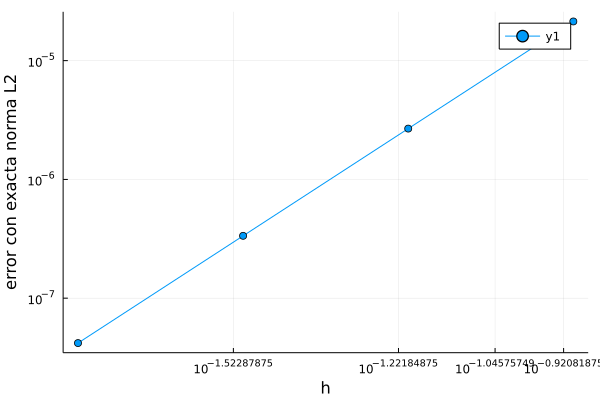

In [59]:
using Plots
plot(h,real(Q), xaxis=:log, yaxis=:log,   shape=:auto,
    xlabel="h",ylabel="error con exacta norma L2", xticks = 0:0.03:0.2)


In [60]:
Q_log= log.(real(Q))
h_log= log.(h)

4-element Vector{Float64}:
 -2.0794415416798357
 -2.772588722239781
 -3.4657359027997265
 -4.1588830833596715

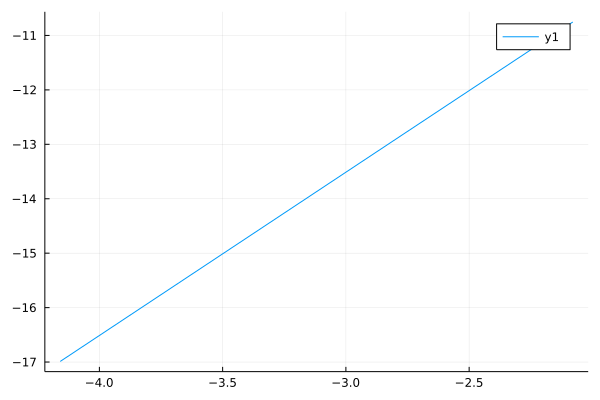

In [61]:
plot(h_log,Q_log)

In [63]:
using Polynomials
pol=fit(h_log,Q_log,1)



Polynomial(-4.516547089518142 + 2.9987332963487896*x)

### Probemos cambiando los elementos

In [80]:
N= [3,4,5,6]

4-element Vector{Int64}:
 3
 4
 5
 6

In [81]:
H=zeros(4)
Q=zeros(4)

4-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0

In [143]:
Q=zeros(ComplexF64, 4)

4-element Vector{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [144]:
for i in [1,2,3,4]
    H[i] = 1/(2^N[i])
    par = (-10,10, H[i]) #for test (Length_x, Length_y, h) 
    model = make_model(grid_type, par) 
    
    Ω = Triangulation(model)
    dΩ = Measure(Ω,degree)
    
    V = TestFESpace(model,reffe;vector_type=Vector{ComplexF64},conformity=:H1,dirichlet_tags = dirichlet_tags)
    U = TrialFESpace(V,dirichlet_values)
    
    a(u,v) = ∫(p*∇(v)⋅∇(u) + q*v*u)*dΩ
    m(u,v) = ∫(r*u*v)dΩ
    
    prob = EigenProblem(a, m, U, V; nev=nev, tol=10^(-10), maxiter=100, explicittransform=:none, sigma=-1.0)
    ξ, uₕs = solve(prob);
    
    uₕ=uₕs[1]
    u11= sum(∫(uₕ*uₕ)*dΩ)
    
    el2= u1_exacta - uₕs[1]/sqrt(u11)

    Q[i]= sqrt(sum(∫(el2 .*el2)*dΩ))
end

Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Done meshing 1D (Wall 0s, CPU 0s)
Info    : 161 nodes 162 elements
Info    : Writing 'models/1D.msh'...
Info    : Done writing 'models/1D.msh'
Info    : Reading 'models/1D.msh'...
Info    : 3 entities
Info    : 161 nodes
Info    : 162 elements
Info    : Done reading 'models/1D.msh'
Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Done meshing 1D (Wall 0.00100088s, CPU 0s)
Info    : 321 nodes 322 elements
Info    : Writing 'models/1D.msh'...
Info    : Done writing 'models/1D.msh'
Info    : Reading 'models/1D.msh'...
Info    : 3 entities
Info    : 321 nodes
Info    : 322 elements
Info    : Done reading 'models/1D.msh'
Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Done meshing 1D (Wall 0s, CPU 0s)
Info    : 641 nodes 642 elements
Info    : Writing 'models/1D.msh'...
Info    : Done writing 'models/1D.msh'
Info    : Reading 'models/1D.msh'...
Info    : 3 entities
Info    : 641 nodes
Inf

In [145]:
H

4-element Vector{Float64}:
 0.125
 0.0625
 0.03125
 0.015625

In [146]:
Q

4-element Vector{ComplexF64}:
  0.0007181774999637516 + 3.664103535116814e-16im
 0.00017964793532280115 - 4.758497617505431e-16im
   4.491848787633414e-5 - 1.9179893955476202e-16im
  1.1230028962729405e-5 - 2.8250070559176734e-16im

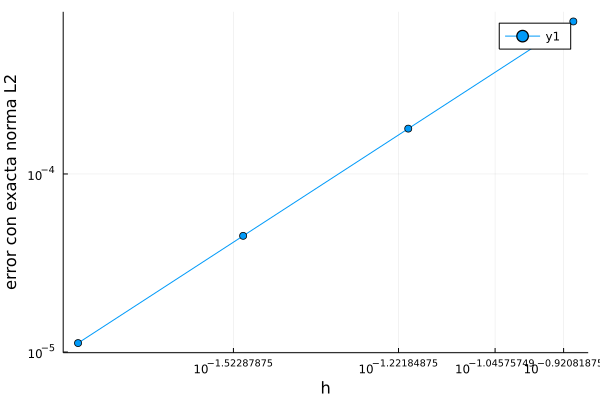

In [147]:
using Plots
plot(H,real(Q), xaxis=:log, yaxis=:log,   shape=:auto,
    xlabel="h",ylabel="error con exacta norma L2", xticks = 0:0.03:0.2)

In [149]:
Q_log= log.(real(Q))
H_log= log.(H)

4-element Vector{Float64}:
 -2.0794415416798357
 -2.772588722239781
 -3.4657359027997265
 -4.1588830833596715

In [150]:
using Polynomials
pol2=fit(H_log,Q_log,1)

Polynomial(-3.0804848146927646 + 1.9996511791635718*x)